In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
%matplotlib inline

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
! nvidia-smi

Fri Feb  3 01:41:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    29W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install --upgrade fastai fastcore timm kaggle pynvml nbdev -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.0 MB/s eta 0:00:00


In [7]:
from pathlib import Path
base_folder = Path('/content/drive/MyDrive/data/datasets/ACM-Research-coding-challenge')

In [8]:
data_folder = base_folder/'data'
model_folder = base_folder/'models'
archive_folder = base_folder/'archive'
# kaggle_api = base_folder/'.kaggle'

In [9]:
data_folder.mkdir(exist_ok=True, parents=True)
model_folder.mkdir(exist_ok=True, parents=True)
# kaggle_api.mkdir(exist_ok=True, parents=True)
archive_folder.mkdir(exist_ok=True, parents=True)

In [10]:
!ls -la {archive_folder}

total 9
-rw------- 1 root root 8484 Feb  3 01:14 'Star Prediction.csv'


In [ ]:
data_file = archive_folder/'Star Prediction.zip'

In [ ]:
# !unzip -q {data_file} -d {data_folder}

In [11]:
Path.BASE_PATH = data_folder

In [16]:
df = pd.read_csv('/content/drive/MyDrive/data/datasets/ACM-Research-coding-challenge/archive/Star Prediction.csv')

In [36]:
Star = df

In [37]:
Star

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [18]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [20]:
#Unique Entries 

df.nunique().to_frame().transpose()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,228,208,216,228,6,19,7


In [22]:
occurrences = df['Star type'].value_counts().to_frame().rename(index=str, columns={'Star type': 'Occurrences'})
occurrences

,Occurrences
0,40
1,40
2,40
3,40
4,40
5,40


In [76]:
# Get the value counts for each star type
value_counts = df['Star type'].value_counts()

# Get the most common star type
most_common_star_type = value_counts.index[0]

print("Most common star type:", most_common_star_type)

Most common star type: 0


In [24]:
import seaborn as sns

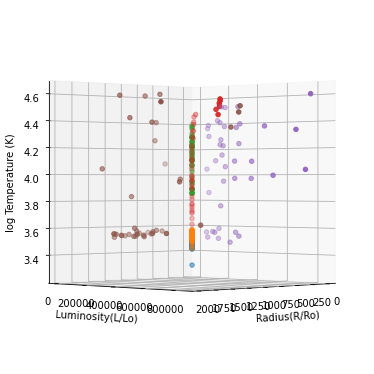

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
for obj in astrObjs:
    luminous = df[df['Star type'] == obj]
    ax.scatter(luminous['Radius(R/Ro)'], luminous['Luminosity(L/Lo)'], np.log10(luminous['Temperature (K)']))
ax.set_xlabel('Radius(R/Ro)')
ax.set_ylabel('Luminosity(L/Lo)')
ax.set_zlabel('log Temperature (K)')
ax.view_init(elev = 0, azim=45)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [42]:
def load_dataset():
    df = pd.read_csv('/content/drive/MyDrive/data/datasets/ACM-Research-coding-challenge/archive/Star Prediction.csv')
    return df

df = load_dataset()


In [52]:
import numpy as np
np.random.seed(100)



In [55]:
X = df.drop('Star type', axis=1)
y = df['Star type']


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [60]:
from sklearn.preprocessing import OneHotEncoder


In [61]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_X = encoder.fit_transform(X)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.2, random_state=0)


In [63]:
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)


In [64]:
y_pred = rf.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.2460458333333335


In [68]:
from sklearn.svm import SVR

In [69]:
svr = SVR(kernel='linear').fit(X_train, y_train)



In [70]:
# Make predictions on the testing data
y_pred = svr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("SVM - Mean Squared Error:", mse)

SVM - Mean Squared Error: 1.449563757150145


In [72]:
# Getting the feature importances from the trained model
importances = rf.feature_importances_



In [73]:
# Getting the names of the features
features = X.columns




In [74]:
# Sorting the features by their importances
sorted_importances = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)




In [75]:
# Print the top 10 most influential features
print("Top 10 most influential features:")
for feature, importance in sorted_importances[:10]:
    print(f"{feature}: {importance:.3f}")



Top 10 most influential features:
Absolute magnitude(Mv): 0.000
Spectral Class: 0.000
Star color: 0.000
Temperature (K): 0.000
Radius(R/Ro): 0.000
Luminosity(L/Lo): 0.000


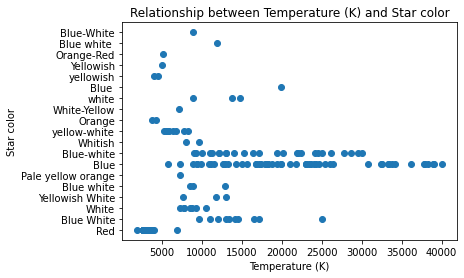

In [79]:
plt.scatter(df['Temperature (K)'], df['Star color'])
plt.xlabel('Temperature (K)')
plt.ylabel('Star color')
plt.title('Relationship between Temperature (K) and Star color')
plt.show()

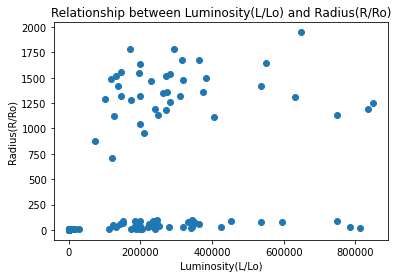

In [80]:
plt.scatter(df['Luminosity(L/Lo)'], df['Radius(R/Ro)'])
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Radius(R/Ro)')
plt.title('Relationship between Luminosity(L/Lo) and Radius(R/Ro)')
plt.show()

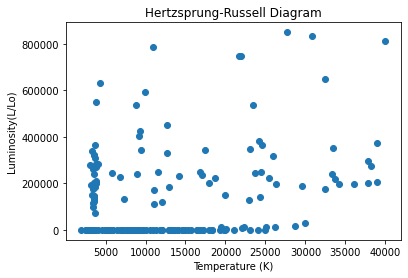

In [81]:
plt.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'])
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram')
plt.show()

In [82]:
sun_temperature = 5778
sun_luminosity = 1.0

In [84]:
 #Calculate the difference between Sun's properties and properties of the Stars in the Dataset
df['Temperature Difference'] = np.abs(df['Temperature (K)'] - sun_temperature)
df['Luminosity Difference'] = np.abs(df['Luminosity(L/Lo)'] - sun_luminosity)


In [85]:
min_difference = df[['Temperature Difference', 'Luminosity Difference']].min(axis=1)
df['Difference'] = min_difference
most_similar_star = df.loc[df['Difference'].idxmin()]


In [86]:
print(most_similar_star)

Temperature (K)                   5587
Luminosity(L/Lo)                 0.819
Radius(R/Ro)                      0.99
Absolute magnitude(Mv)            5.03
Star type                            3
Star color                yellow-white
Spectral Class                       F
Temperature Difference             191
Luminosity Difference            0.181
Difference                       0.181
Name: 39, dtype: object
